# Authoring and publishing a notebook with jupytext and pandoc

This is a quick post to explore two interesting tools for authoring
and publishing quality documents with Jupyter Notebooks. We'll use a two
step process and see how far we can get!

## What we'll use

We are going to try to do the following:

* Write all of our content in Jupyter Notebooks (keep it to a single page
  for now)
* Use Jupytext to maintain a text representation of our notebook automatically.
* Use Pandoc and nbconvert to convert our notebook to **HTML**, **PDF**, and **epub**.

In the process, we want to include the ability to:

* Generate citations
* Embed figures and code outputs
* Enable some interactive elements (like hiding code) in the HTML

Along the way we may enounter some snags, but let's give it a shot!

## A short code example

For demonstration's sake, here's a code example we'd like to include with
our conversions. We'll use Matplotlib [@Hunter2007] and in the Jupyter Notebook [@Kluyver2016].

[Text(0.5, 1.0, 'My awesome plot')]

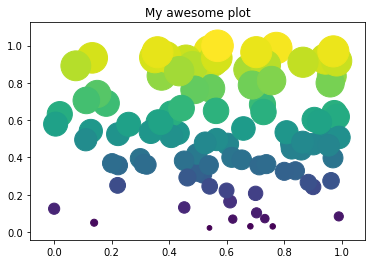

In [8]:
import numpy as np
import matplotlib.pyplot as plt

data = np.random.random((2, 100))
fig, ax = plt.subplots()
ax.scatter(*data, c=data[1], s=data[1]*1000)
ax.set(title="My awesome plot")

**Tags** - we'll also add a tag to this markdown cell in order to
see how it shows up in the text representations.

Using the celltags JupyterLab plugin, there's a nifty UI that lets us do this
quickly:

![](./images/tags.png){#img0 .img}

Let's see how this plot looks in the final product!

## Authoring

First off, we'll use Jupytext to maintain a text representation of our notebook at each
step of the way.

Jupytext provides a few pieces of functionality. It is first a **Converting tool**
to go from the `.ipynb` format to a number of text based formats. For this post, we'll
use **Markdown**. This will make it much easier to diff and merge versions of the notebook.

Second, Jupytext is also a **Jupyter server extension**. What does this mean? We can embed
a piece of metadata into the notebook itself that tells Jupytext which formats we'd like
to store alongside the `.ipynb` format. With that metadata in place, Jupytext will first
convert the `.ipynb` format into the format we specify. It will then **look for any changes**
to either of the two files, and automatically mirror that change in the other format.

Let's enable this now.

**Note: this assumes you've already install Jupytext, pandoc, and nbconvert**

### Enabling the Jupytext auto-conversion

First off, we'll use JupyterLab to do our authoring. Jupytext also has a JupyterLab plugin
that allows you to control its behavior per notebook. To enable it, bring up the **command
palette** in JupyterLab by clicking `ctrl + shift + c` (on windows). Then type `jupytext`.
You should see a list of available commands to control Jupytext.

We'll choose the "Pair notebook with markdown" option, which is a nice default for a
human-friendly text representation.

![](./images/jupytext_command.png){#img2 .img}

By clicking this option, you tell Jupytext to embed a piece of metadata in the notebook
that tells it which formats should exist *alongside* the `.ipynb` format. You can inspect
this metadata with the JSON viewer:

![](./images/json_metadata.png){#img3 .img}

You should now also see a new markdown file (with the same name as the notebook)
once you save the notebook for the first time. **These two files are mirrored**.
Any changes you make to one will be reflected in the other (provided that your Jupyter
Server is running).

### Inspecting the markdown cell

Let's take a look at the markdown cell. First, we'll look at the markdown sections. Here's
how they look:


    ## A short code example

    For demonstration's sake, here's a code example we'd like to include with
    our conversions:

    ```python tags=["hidecode"]
    import numpy as np
    import matplotlib.pyplot as plt

    data = np.random.random((2, 100))
    fig, ax = plt.subplots()
    ax.scatter(*data, c=data[1], s=data[1]*1000)
    ax.set(title="My awesome plot")
    ```

    <!-- #region {"tags": ["testtag"]} -->
    **Tags** - we'll also add a tag to this markdown cell in order to
    see how it shows up in the text representations.

    Using the celltags JupyterLab plugin, there's a nifty UI that lets us do this
    quickly:

    <img src="images/tags.png" width=500px />

    Let's see how this plot looks in the final product!
    <!-- #endregion -->

As you can see, jupytext embeds the cell-level metadata in different regions
that it uses to delineate sections of the noteobok. Code cells are defined by
backticks, and markdown cells are delineated by `<!-- #region -->`.

Also note that there are no image outputs in the markdown - that's desired! If
we were to commit these files to a repository, we can use the markdown to see
which **content** has changed, and use the `.ipynb` to preview the final product.



## A bibliography

Finally, you may have noticed above that we added a couple latext-style citations.
Let's add the shortcode for rendering a bibliography with Pandoc and see how this
looks! For this, we'll use this Pandoc shortcode:

::: {#refs}
:::

Note that these citations take this form: `@mycitation` and the citation data is
stored in `bibliography.bib`. 

## Publishing our document

Now that we've got some nice content for our document, let's try converting it to
some common publishing outputs. We'll use **pandoc** for this, because of its native
document conversion tools.

### Converting to HTML

First off, we'll convert the page to HTML. We'll use the following command:

In [2]:
# Now convert with pandoc
!pandoc --filter pandoc-citeproc --bibliography ./bibliography.bib\
    -f ipynb+citations+link_attributes \
    --extract-media ./extracted \
    -s \
    -M pagetitle="My title" \
    -M link-citations="true" \
    ./post.ipynb -o post.html

# Now copy the output to a new folder (we had to create the new file in this folder so the linking worked properly)
!rm -rf ../published
!mkdir ../published
!mv ./post.html ../published
!mv ./extracted ../published/extracted

In [ ]:
'